In [2]:
! pip install pymorphy2
import nltk
nltk.download('punkt')
nltk.download('stopwords')
!pip install -qq transformers
!git clone https://github.com/sirius-devel/fedorova_ai_architect_course.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=03521db5a9fdc17f31d0ffd9deb67afbbea71d5b13371f35e9cb550bad03dc43
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.6 MB/s eta 0:00:00
Cloning into 'fedorova_ai_architect_course'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 31 (delta 6), reused 26 (delta 4), pack-reused 0
Receiving objects: 100% (31/31), 2.07 MiB | 10.99 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Encountered 3 file(s) that should have been pointers, but weren't:
	data_theme_39.csv
	dataset_tk.csv
	diabetes.csv


In [3]:
import pymorphy2
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from collections import defaultdict
from textwrap import wrap
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
import torch.nn as nn
import torch.nn.functional as F
import random
import time

In [4]:
texts = ["Я начал жизнь в трущобах городских, "
"И добрых слов я не слыхал. "
"Когда ласкали вы детей своих- "
"Я есть просил, я замерзал. "
"Вы увидав меня не прячьте взгляд, "
"Ведь я ни в чем, ни в чем не виноват. "
"За что вы бросили меня, за что? "
"Где мой очаг? Где мой ночлег? "
"Не признаете вы мое родство, "
"А я ваш брат, я человек. "
"Вы вечно молитесь своим богам, "
"И ваши боги все прощают вам. "
"Край небоскребов и роскошных вилл, "
"Из окон льет слепящий свет. "
"О, если б мне хоть раз набраться сил, "
"Вы б дали мне за все ответ. "
"Откройте двери, люди, я ваш брат, "
"Ведь я ни в чем, ни в чем не виноват. "
"Вы знали ласки матерей родных, "
"А я не знал и лишь во сне, "
"В моих мечтаньях детских золотых, "
"Мать иногда являлась мне. "
"О мама если бы найти тебя, "
"Была б не так горька судьба моя. ",
"Ночь по улицам пошла звездной поступью царицы. "
"Слов и чисел простота у небесного моста. "
"Раскидала перья птица. "
"Не забудутся ни кем праздник губ, обиды глаз. "
"Забери меня в свой плен. "
"Эту линию колен целовать последний раз. "
"Только рюмка водки на столе, ветер плачет за окном. "
"Тихо болью отзываются во мне этой молодой луны крики. "
"Не легко тебя отдать парусам ветров и птиц. "
"Может, даже, не понять, может, даже, не узнать "
"среди тысяч женских лиц. "
"Пусть глаза мои молчат. Молча смотрят на луну. "
"Если кто поймает взгляд, поторопится назад, сам не знаю почему. "
"Только рюмка водки на столе, ветер плачет за окном. "
"Тихо болью отзываются во мне этой молодой луны крики. "
"Только рюмка водки на столе, ветер плачет за окном. "
"Тихо болью отзываются во мне этой молодой луны крики. ",
"Белый снег, серый лёд "
"На растрескавшейся земле, "
"Одеялом лоскутным на ней "
"Город в дорожной петле. "
"А над городом плывут облака,"
"Закрывая небесный свет, "
"А над городом жёлтый дым,"
"Городу две тысячи лет, "
"Прожитых под светом "
"Звезды по имени Солнце. "
"И две тысячи лет война, "
"Война без особых причин, "
"Война дело молодых, "
"Лекарство против морщин. "
"Красная, красная кровь, "
"Через час уже просто земля, "
"Через два на ней цветы и трава, "
"Через три она снова жива, "
"И согрета лучами звезды "
"По имени Солнце. "
"И мы знаем, что так было всегда, "
"Что судьбою больше любим, "
"Кто живёт по законам другим "
"И кому умирать молодым. "
"Он не помнит слово «Да» и слово «Нет», "
"Он не помнит ни чинов, ни имён "
"И способен дотянуться до звёзд, "
"Не считая, что это сон, "
"И упасть, опалённым звездой "
"По имени Солнце. ",
"А на войне, как на войне - "
"Патроны, водка, махорка в цене. "
"А на войне нелёгкий труд, "
"А сам стреляй, а то убьют. "
"А на войне, как на войне... "
"Подруга, вспомни обо мне. "
"А на войне - неровен час, "
"А может - мы, а может - нас. "
"Комбат-батяня, батяня-комбат, "
"Ты сердце не прятал за спины ребят. "
"Летят самолеты, и танки горят, "
"Так бьёт-ё комбат-ё, комбат!.. "
"Комбат-батяня, батяня-комбат, "
"За нами Россия, Москва и Арбат! "
"Огонь, батарея!.. Огонь, батальон!.. "
"Комбат-ё, командует он. "
"Огонь, батарея!.. Огонь, батальон! "
"Огонь, батарея!.. Огонь, батальон! "
"Огонь, батарея!.. Огонь, батальон! "
"Огонь, батарея! "
"Огонь! Огонь!! Огонь!!! Огонь и я..."
"А на войне, как на войне - "
"Солдаты видят мамку во сне. "
"На войне... да, то оно... "
"Там все серьёзней, чем в кино. "
"Да, война, война, война... "
"Дурная тётка, стерва она! "
"Эх, война, война идёт, "
"А пацана девчонка ждёт. "
"А на войне, как на войне, "
"А на войне, как на войне...",
"Когда я умру - я стану ветром "
"И буду жить над твоей крышей "
"Когда ты умрёшь ты станешь солнцем "
"И всё равно меня будешь выше "
"Осенним ветром я буду где-то "
"Летать с тобой ветром по свету "
"Ты не поймёшь, а я незаметно "
"Шепну теплом: \"Ах, солнце, где ты ?\" "
"Только ты не будь пока солнцем "
"Слышишь, я буду петь тебе песни с крыш "
"Я буду снова той, кем ты дышишь "
"Осталось ветром лишь стать "
"Я буду ждать лишь твоей улыбки "
"И буду слушать твои пластинки "
"С твоих ресниц собирать снежинки "
"Осталось ветром лишь стать "
"Когда я умру - я стану ветром "
"На землю падать первым снегом "
"Смеясь летать с тобой по свету "
"И нет счастливей в мире этом "
"Когда ты умрёшь ты станешь солнцем "
"И украдёшь мои морозы "
"И зацветут в садах мимозы "
"И сердца льдинки станут слёзы "
"Только ты не будь пока солнцем "
"Слышишь, я буду петь тебе песни с крыш "
"Я буду снова той, кем ты дышишь "
"Осталось ветром лишь стать "
"Я буду ждать лишь твоей улыбки "
"И буду слушать твои пластинки "
"С твоих ресниц собирать снежинки "
"Осталось ветром лишь стать ",
"Почему все не так? Вроде все как всегда: "
"То же небо опять голубое, "
"Тот же лес, тот же воздух и та же вода, "
"Только он не вернулся из боя. "
"Тот же лес, тот же воздух и та же вода, "
"Только он не вернулся из боя. "
"Мне теперь не понять, кто же прав был из нас "
"В наших спорах без сна и покоя. "
"Мне не стало хватать его только сейчас, "
"Когда он не вернулся из боя. "
"Он молчал невпопад и не в такт подпевал: "
"Он всегда говорил про другое. "
"Он мне спать не давал, он с восходом вставал, "
"А вчера не вернулся из боя. "
"То что пусто теперь - не про то разговор, "
"Вдруг заметил я: нас было двое. "
"Для меня будто ветром задуло костер, "
"Когда он не вернулся из боя. "
"Нынче вырвалась, будто из плена весна- "
"По ошибке окликнул его я: "
"\"Друг, оставь покурить\" - А в ответ тишина... "
"Он вчера не вернулся из боя. "
"Наши мертвые нас не оставят в беде: "
"Наши мертвые как часовые. "
"Отражается небо в лесу как в воде, "
"И деревья стоят голубые. "
"Нам и места в землянке хватало вполне, "
"Нам и время - текло для обоих. "
"Все теперь одному, только кажется мне: "
"Это я не вернулся из боя ",
"Ты дарила мне розы, "
"Розы пахли полынью. "
"Знала все мои песни, "
"Шевелила губами. "
"Исчезала мгновенно, "
"Не сидела в засаде, "
"Никогда не дышала "
"Тихонько в трубу "
"Мы скрывались в машинах "
"Равнодушных таксистов, "
"По ночным автострадам "
"Нарезали круги. "
"Ты любила холодный "
"Обжигающий виски "
"И легонько касалась "
"Горячей руки "
"А потом было лето. "
"Мы прощались и знали: "
"Мы с тобой одной крови, "
"Мы небесных кровей. "
"Твои драные джинсы "
"И монгольские скулы. "
"Ты была моей тайной, "
"Зазнобой моей ",
"Ты сильно изменилась. "
"Я знал тебя девчонкой: "
"Две черные косички, "
"Тоненькие ножки. "
"И кто бы мог подумать, "
"Что из того котенка "
"Ты вырастешь красивой "
"Дикой черной кошкой? "
"На ощупь шелковиста, "
"Ты хищница, однако, "
"′Эй, уберите руки′ говоришь. "
"Плейбои и артисты "
"Пытаются напрасно - "
"Чёрную кошку им не приручить. "
"Чёрной кошки нет опасней "
"Для натуры суеверной "
"Постаревшим ловеласам "
"Кошки действуют на нервы. "
"Если гибкою походкой "
"Перейдёт тебе дорогу "
"Эта чёрная красотка, "
"Объявляй, дружок, тревогу. "
"Никто из них не видел, "
"Как ты ночами плачешь, "
"И слухи о тебе несёт молва людская. "
"Что ты всегда мужчинам "
"Приносишь неудачи, "
"А женщины кричат: "
"′Ты - кошка роковая!′ "
"На ощупь шелковиста, "
"Ты хищница, однако, "
"′Эй, уберите руки′ говоришь. "
"Плейбои и артисты "
"Пытаются напрасно - "
"Чёрную кошку им не приручить. "
"Чёрной кошки нет опасней "
"Для натуры суеверной "
"Постаревшим ловеласам "
"Кошки действуют на нервы. "
"Если гибкою походкой "
"Перейдёт тебе дорогу "
"Эта чёрная красотка, "
"Объявляй, дружок, тревогу. ",
"В газетах писали, что ты уезжаешь, "
"Что рейс не отменят, что рейс не отложат "
"Какие-то люди тебя окружают, "
"А ближе, чем были, уже невозможно… "
"В красивых журналах считают пунктиры, "
"А я до квартиры вечернее сальто "
"И кривятся губы, и кофе противен, "
"И новое утро. и новое нет тебя… "
"Я по асфальту шагаю "
"С тем, кого сберечь не смогу "
"До остановки трамвая, "
"Звенящего на бегу "
"В газетах писали, что ты идиотка, "
"Во всем виновата проклятая водка "
"Ругаешься матом и песен не пишешь "
"Тебя окружают не люди, а мыши "
"В красивых журналах считают пунктиры, "
"такое не выдумать даже нарочно "
"А я каждый вечер ползу до квартиры, "
"И ближе, чем были, уже невозможно… ",
"Она скинет пальто, выпьет вина, чтобы согреться. "
"Она, просто никто, но отчего так бьется сердце? "
"Душа моя на замки закрыта от всех людей и на миллионы дней. "
"Душа моя к небесам пришита, ну что я нашел в ней? "
"Она умеет делать мне любовь, "
"Может выпить без остатка мне всю кровь, "
"Может быть со мной холодной, как зима, "
"И опять сведет, сведет меня с ума. "
"Она знает мужчин, я это все чувствую кожей. "
"Она - мой кокаин, мой ЛСД и даже больше. "
"Душа моя на замки закрыта от всех людей и на миллионы дней. "
"Душа моя к небесам пришита, ну что я нашел в ней? "
"Она умеет делать мне любовь, "
"Может выпить без остатка мне всю кровь, "
"Может быть со мной холодной, как зима, "
"И опять сведет, сведет меня с ума. "
"И опять сведет, сведет меня с ума. "
"И опять сведет, сведет меня с ума. "
"Сведет меня с ума. "
"Сведет меня с ума. "
]

**TF-IDF**

**Лемматизация**


In [5]:
morph = pymorphy2.MorphAnalyzer()

In [6]:
def custom_tokenizer(text):
  tokeniz = RegexpTokenizer(r'\w{2,}')
  txt = tokeniz.tokenize(text)
  return [morph.parse(w)[0].normal_form for w in txt]

**Стоп-слова**

In [7]:
from itertools import count
s = stopwords.words("russian")
tfidf_vectorizer = TfidfVectorizer(stop_words=s, use_idf=True, tokenizer=custom_tokenizer, sublinear_tf=True)
tfidf = tfidf_vectorizer.fit_transform(texts)
tfidf_vectorizer.vocabulary_

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['большой', 'весь', 'всё', 'ещё', 'мочь', 'нибыть', 'свой', 'хороший', 'это'] not in stop_words.
  warnings.warn(


{'начать': 203,
 'жизнь': 92,
 'трущоба': 395,
 'городской': 59,
 'добрый': 77,
 'слово': 348,
 'слыхать': 351,
 'ласкать': 147,
 'ребёнок': 318,
 'свой': 336,
 'просить': 299,
 'замерзать': 103,
 'увидать': 400,
 'прятать': 306,
 'взгляд': 28,
 'виноватый': 32,
 'бросить': 19,
 'очаг': 251,
 'ночлег': 219,
 'признать': 292,
 'родство': 322,
 'ваш': 20,
 'брат': 18,
 'человек': 421,
 'вечно': 27,
 'молиться': 183,
 'бог': 14,
 'всё': 44,
 'прощать': 304,
 'край': 136,
 'небоскрёб': 207,
 'роскошный': 325,
 'вилла': 30,
 'окно': 232,
 'лить': 156,
 'слепить': 347,
 'свет': 335,
 'набраться': 196,
 'сила': 341,
 'дать': 65,
 'ответ': 243,
 'открыть': 246,
 'дверь': 66,
 'знать': 114,
 'ласка': 146,
 'мать': 173,
 'родный': 321,
 'лишь': 158,
 'сон': 364,
 'мечтание': 178,
 'детский': 74,
 'золотой': 115,
 'являться': 433,
 'мама': 170,
 'найти': 198,
 'горький': 60,
 'судьба': 375,
 'ночь': 221,
 'улица': 404,
 'пойти': 276,
 'звёздный': 110,
 'поступь': 286,
 'царица': 415,
 'число': 42

In [8]:
tfidf.todense()[2]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.11010613, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.09360027, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.19643068, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.18642588, 0.        , 0.        , 0.26274564, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.11010613, 0

In [9]:
df = pd.read_csv("/content/fedorova_ai_architect_course/IMDB_Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.shape

(50000, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [12]:
#Набор данных сбалансирован, в нём 25000 позитивных и 25000 негативных высказываний
df[df.sentiment=='positive'].shape

(25000, 2)

In [13]:
df[df.sentiment=='negative'].shape

(25000, 2)

In [15]:
def process_review(review):
  """Process tweet function.
  Input:
      string containing a review
  Output:
      list of words containing the processed review
  """
  # remove old style retweet text "RT"
  review = re.sub(r'^RT[\s]+', '', review)
  # remove hyperlinks
  review = re.sub(r'https?:\/\/.*[\r\n]*', '', review)
  review = re.sub(r'#', '', review)
  # removing hyphens
  review = re.sub('-', ' ', review)
  # remove linebreaks
  review = re.sub('<br\s?\/>|<br>', "", review)
  # remving numbers
  review = re.sub(r"(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b",'',review)

  # tokenize reviews
  tokenizer = TweetTokenizer(preserve_case=True, strip_handles=True,
                              reduce_len=True)
  tweet_tokens = tokenizer.tokenize(review)

  # remove numbers
  tweet_tokens = [i for i in tweet_tokens if not i.isdigit()]

  tweets_clean = []
  for word in tweet_tokens:
    tweets_clean.append(word)

  return ' '.join(tweets_clean)

In [16]:
# Lets apply above function to every tweet in df
#df['review_processed'] = df['review'].apply(process_review)

# Also lets encode 'sentiment' column. 1 for positive and 0 for negative sentiment
df['sentiment'] = df['sentiment'].map({'positive':1,'negative':0}).astype(dtype='long')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [18]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Create a function to tokenize a set of texts
def preprocessing_for_bert(data):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []

    # For every sentence...
    for rw in data.review.to_numpy():
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=process_review(rw),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN, # Max length to truncate/pad
            truncation = True,
            padding = 'max_length',         # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True      # Return attention mask
            )

        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))

    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)

    return input_ids, attention_masks

In [21]:
df_train, df_test = train_test_split(df, test_size = 0.3,random_state = 42)
df_val, df_test = train_test_split(df_test, test_size = 0.5,random_state = 42)

In [22]:
# Specify `MAX_LEN`
MAX_LEN = 512 #обрежем слишком длинные комментарии

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(df_train)
val_inputs, val_masks = preprocessing_for_bert(df_val)

Tokenizing data...


In [23]:
# Convert other data types to torch.Tensor
train_labels = torch.tensor(df_train.sentiment.to_numpy())
val_labels = torch.tensor(df_val.sentiment.to_numpy())

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 16

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

In [24]:
# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [1]:
def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = torch.optim.AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [26]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
set_seed(42)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, val_dataloader, epochs=2, evaluation=True)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------


In [ ]:
def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits = []

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs

In [ ]:
def evaluate_roc(probs, y_true):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')

    # Plot ROC AUC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.9783
Accuracy: 92.79%


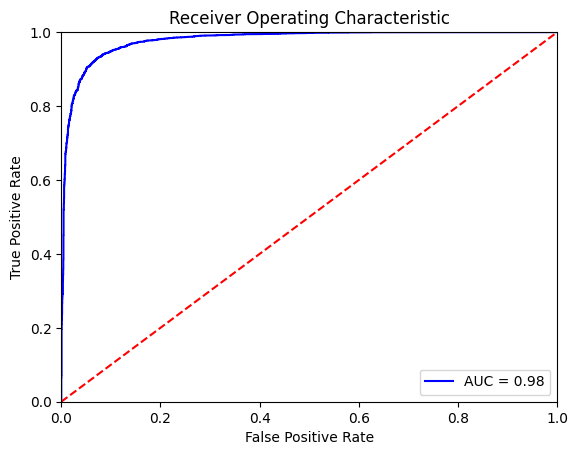

In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, df_val.sentiment.to_numpy())

In [ ]:
df_test.review.sample(5)

43244    Horrible writing, directing and acting! The wr...
8600     .......Playing Kaddiddlehopper, Col San Fernan...
42110    007's Goldeneye is one of the best N64 release...
36364    If you want Scream or anything like the big-st...
21081    One of the weaker Carry On adventures sees Sid...
Name: review, dtype: object

In [ ]:
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks = preprocessing_for_bert(df_test)

# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=16)

Tokenizing data...


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Compute predicted probabilities on the test set
probs = bert_predict(bert_classifier, test_dataloader)

# Get predictions from the probabilities
threshold = 0.9
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("Number of tweets predicted non-negative: ", preds.sum())

Number of tweets predicted non-negative:  3621
